In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [70]:
#Fetch Images count from Fodlers

In [2]:
count = 0 
dirs = os.listdir('Brain_Stroke_CT-SCAN_image2/')
for dir in dirs:
    files = list(os.listdir('Brain_Stroke_CT-SCAN_image2/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

hemorrhagic Folder has 886 Images
ischemic Folder has 1394 Images
Images Folder has 2280 Images


In [72]:
#Load Images into Arrays as Dataset

In [3]:
base_dir = 'Brain_Stroke_CT-SCAN_image2/'
img_size = 180
batch = 32

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 2280 files belonging to 2 classes.
Using 1824 files for training.
Found 2280 files belonging to 2 classes.
Using 456 files for validation.


In [5]:
stroke_classificate = train_ds.class_names
stroke_classificate

['hemorrhagic', 'ischemic']

In [6]:
import matplotlib.pyplot as plt

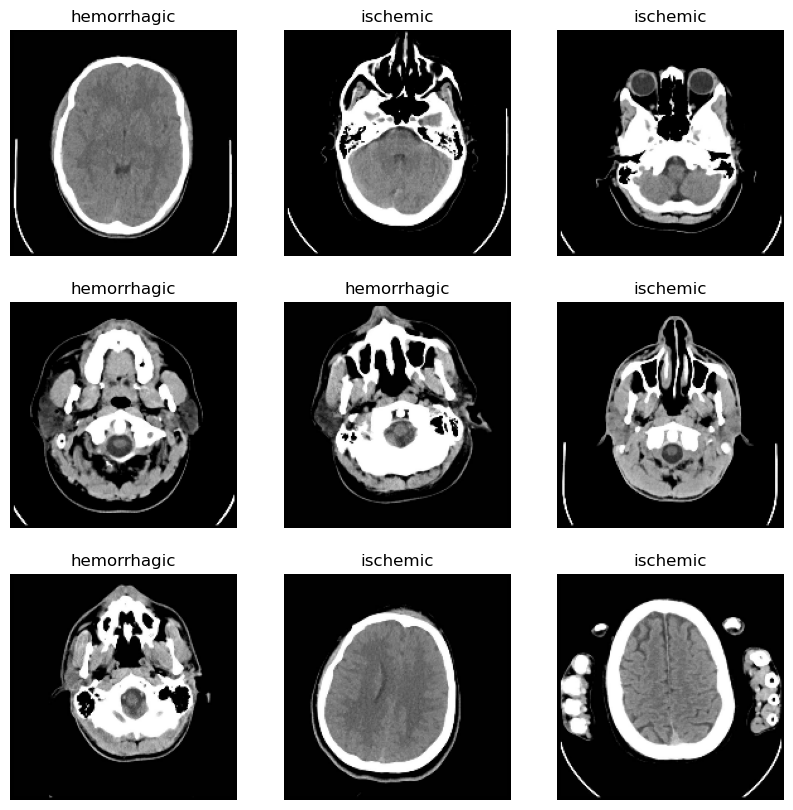

In [7]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(stroke_classificate[labels[i]])
        plt.axis('off')

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

In [8]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [9]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [81]:
#Data Augmentation

In [10]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

g:\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


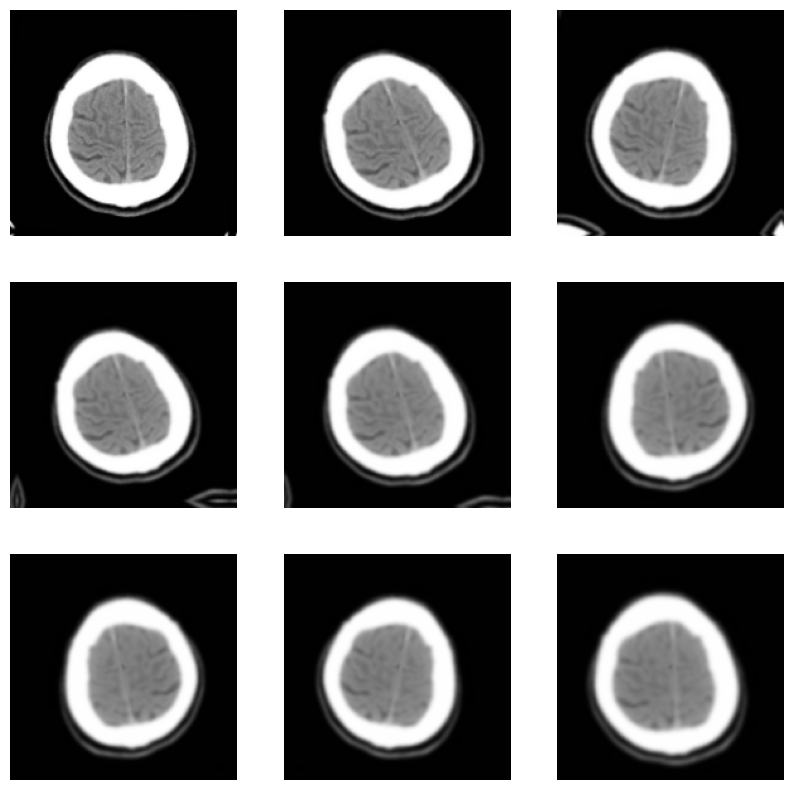

In [12]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [84]:
#Model Creation

In [11]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 261s 3s/step - accuracy: 0.5561 - loss: 0.8161 - val_accuracy: 0.6382 - val_loss: 0.6382
Epoch 2/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 158s 3s/step - accuracy: 0.5969 - loss: 0.6711 - val_accuracy: 0.6338 - val_loss: 0.6143
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.6289 - loss: 0.6491 - val_accuracy: 0.6469 - val_loss: 0.6058
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.6210 - loss: 0.6453 - val_accuracy: 0.7105 - val_loss: 0.5510
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.6509 - loss: 0.6154 - val_accuracy: 0.6645 - val_loss: 0.6228
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6759 - loss: 0.5943 - val_accuracy: 0.6689 - val_loss: 0.6505
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7133 - loss: 0.5610 - val_accuracy: 0.6732 - val_loss: 0.7073
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.7052 - loss: 0.5614 - val_accuracy: 0.

In [15]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + stroke_classificate[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [16]:
classify_images('Validation/73 (6).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step


'The Image belongs to hemorrhagic with a score of 100.0'

In [17]:
model.save('Stroke_Recog_Modelll.keras')